## Face recognition
https://deepstackpython.readthedocs.io/en/latest/getting-started.html

Run with:
```
sudo docker run -e VISION-FACE=True -v localstorage:/datastore -p 5000:5000 deepquestai/deepstack
```

Note that `detection` and `recogntion` are the same docker run, but different models?

In [1]:
import requests
import matplotlib.pyplot as plt 
from PIL import Image
%matplotlib inline

IP = "localhost"
PORT = "5000"

In [2]:
def get_matched_faces(predictions):
    """
    Get the predicted faces and their confidence.
    """
    return {face['userid']: round(face['confidence']*100, 1) for face in predictions if not face['userid'] == 'unknown'}

In [3]:
ls

Deepstack face dev.ipynb          face_1.jpg
Deepstack object detection.ipynb  face_2.jpg
adele_test.jpg                    face_3.jpg
adele_train.jpg                   family.jpg
face_0.jpg                        test-image3.jpg


In [9]:
#img_file = "family.jpg"
img_file = "bad.jpg"

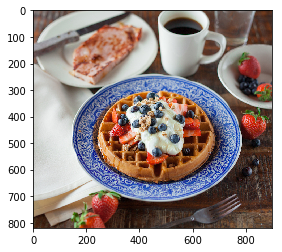

In [10]:
image = Image.open(img_file).convert("RGB")
plt.imshow(image);

Now post the data to Deepstack

In [11]:
image_data = open(img_file,"rb").read()
#response = requests.post(f"http://{IP}:{PORT}/v1/vision/detection", files={"image":image_data}) # detection
response = requests.post(f"http://{IP}:{PORT}/v1/vision/face/recognize", files={"image":image_data}) # recognition

In [12]:
response.status_code

200

In [13]:
response.json()["predictions"]

[]

In [14]:
get_matched_faces(response.json()['predictions'])

{}

## Train
Lets now train on a picture of Adele

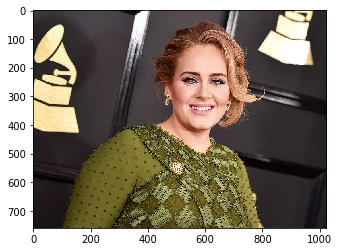

In [10]:
adele_train = Image.open('adele_train.jpg').convert("RGB")
plt.imshow(adele_train);

In [32]:
response = requests.post(f"http://{IP}:{PORT}/v1/vision/face/register",files={"image":open("adele_train.jpg","rb").read()}, data={"userid":""})

In [34]:
response.status_code

200

In [33]:
response.json()

{'success': False, 'error': 'userid not specified'}

In [27]:
response.json()['message']

KeyError: 'message'

In [42]:
def register_face(url, name, file_path):
    """
    Register a name to a file.
    """
    try:
        with open(file_path,"rb") as image:
            response = requests.post(url, 
                                     files={"image":image.read()}, 
                                     data={"userid":name})
            
        if response.status_code == 200 and response.json()['success'] == True:
            print(f"Deepstack taught face {name} using file {file_path}")
        elif response.status_code == 200 and response.json()['success'] == False:
            error = response.json()['error']
            print(f"Deepstack error: {error}")

        else:
            print(response.json())
        
    except Exception as exc:
        print(exc)

In [44]:
# PORT = 1000
url = f"http://{IP}:{PORT}/v1/vision/face/register"
name = "Adele"
file_path = "adele_train.jpg"

register_face(url, name, file_path)

HTTPConnectionPool(host='localhost', port=1000): Max retries exceeded with url: /v1/vision/face/register (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x10943d7b8>: Failed to establish a new connection: [Errno 61] Connection refused',))


Now test

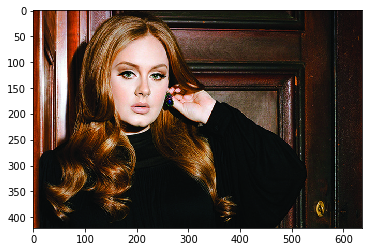

In [13]:
adele_train = Image.open('adele_test.jpg').convert("RGB")
plt.imshow(adele_train);

In [14]:
test_image = open("adele_test.jpg","rb").read()

response = requests.post(f"http://{IP}:{PORT}/v1/vision/face/recognize",files={"image":test_image})
response.json()

{'success': True,
 'predictions': [{'confidence': 0.47628152,
   'userid': 'Adele',
   'y_min': 45,
   'x_min': 126,
   'y_max': 271,
   'x_max': 295}]}

In [15]:
for prediction in response.json()['predictions']:
    print(prediction['userid'], round(prediction['confidence']*100, 1))

Adele 47.6
